In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mean
from collections import defaultdict

In [5]:
start = pd.read_csv('zomato.csv' , encoding = 'latin-1')
df = start.copy()
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
## Cuisines have 9 NaN values as shown 
start.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# 1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

Rest of India  :  705 Restaurants
Delhi-NCR  :  7947 Restaurants


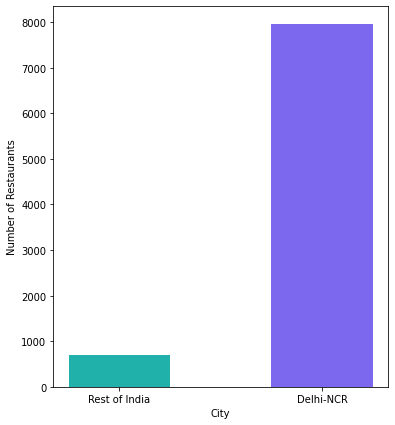

In [12]:
# making copy of original dataset
df = start.copy()


# Cities in Delhi NCR stored in a list
l = ['New Delhi' , 'Ghaziabad' , 'Noida' , 'Faridabad' , 'Gurgaon']
df = df[df['Country Code'] == 1]
#d is a dictionary which will have 2 keys as 'Delhi-NCR' and 'Rest of india' and no. of restaurants as value
d = {}

def convert(city):
    return str(city).strip()
df.City = df.City.apply(convert)

#Iterating in City column , and filling dict d 
for city in df['City']:
    if city in l:
        d['Delhi-NCR'] = d.get('Delhi-NCR' , 0) + 1
    else:
        d['Rest of India'] = d.get('Rest of India' , 0) + 1

#location will store Delhi NCR & Rest Of India as 2 elements ,count will store respective no. of restaurants in each
location = []
count = [] 
for key in d:
    print(key , ' : ' ,d[key],'Restaurants')
    location.append(key)
    count.append(d[key])

#plotting graph
plt.rcParams['figure.figsize'] = (6,7)
plt.bar(location , count , width = 0.5, color=('lightseagreen','mediumslateblue'))
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

# 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.

In [13]:
# making copy of original dataset
data=start.copy()

data = data[data['Country Code'] == 1]
l=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']

# these sets will store cuisines which are present in restaurants of Delhi NCR and 
# cuisines which are not present in rest of india respectively.
del_cu=set()
rest_cu=set()

#filling the sets
for i,k in zip(data['City'],data['Cuisines']):
        if i in l:
            for z in k.split(','):
                del_cu.add(z.strip())
        else:
            for kk in k.split(','):
                rest_cu.add(kk.strip())


#subtracting both sets gives the resulting answer
not_ser=rest_cu-del_cu
for i in not_ser:
    print(i)

German
Malwani
BBQ
Cajun


# 1.3 Top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

NCR ==>
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


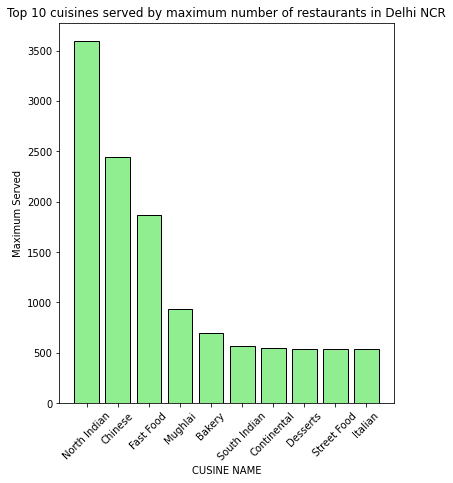

Rest Of India ==>
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


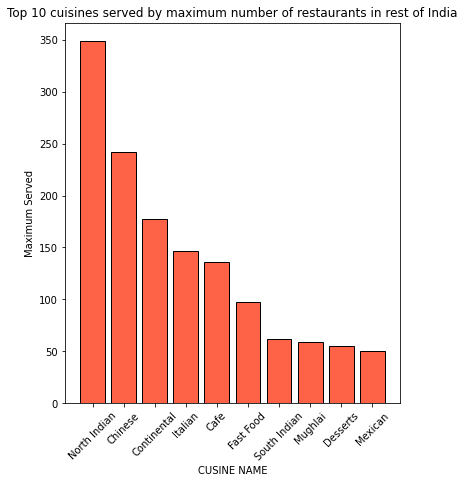

In [22]:
''' Here i am considering different branches of a Restaurant located at different places as separate restaurants
as each restaurant have separate restaurant id . ex : if A Restaurant named "736 AD bar and lounge" has 3 branches 
each serving different or same cuisines then these 3 branches are being treated as 3 different restaurants'''

data=start.copy()
data = data[data['Country Code'] == 1]
data['Cuisines']=data['Cuisines'].fillna("")
l=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad','Delhi-NCR']
cities=[]

for i in data['City']:
    if i in l:
        data['City'].replace(i,"Delhi-NCR",inplace=True)
    else:
        data['City'].replace(i,"Rest of India",inplace=True)
del_cu=[]
rest_cu=[]
for i,j in zip(data['City'],data['Cuisines']):
    if (i=='Delhi-NCR'):    
        for z in j.split(','):
            del_cu.append(z.strip())
    if (i=='Rest of India'):
        for z in j.split(','):
            rest_cu.append(z.strip())
            
cusines_maxncr={}
cusines_maxrest={}

for i in del_cu:
    if i in cusines_maxncr:
        cusines_maxncr[i]+=1
    else:
        cusines_maxncr[i]=1
for i in rest_cu:
    if i in cusines_maxrest:
        cusines_maxrest[i]+=1
    else:
        cusines_maxrest[i]=1

d1=Counter(cusines_maxncr).most_common(10)
d2=Counter(cusines_maxrest).most_common(10)
cus_namencr=[]
cus_noncr=[]
print("NCR ==>")
for i in d1:
    cus_namencr.append(i[0])
    cus_noncr.append(i[1])
    print(i[0],i[1])

# Bar Graph code
plt.bar(cus_namencr, cus_noncr,color='lightgreen',edgecolor='black')
plt.xlabel('CUSINE NAME')
plt.ylabel('Maximum Served')
plt.xticks(label=cus_namencr, rotation=45) 
plt.title('Top 10 cuisines served by maximum number of restaurants in Delhi NCR')
plt.show()


cus_namerest=[]
cus_norest=[]
print("Rest Of India ==>")
for i in d2:
    cus_namerest.append(i[0])
    cus_norest.append(i[1])
    print(i[0],i[1])

# Bar Graph code
plt.bar(cus_namerest, cus_norest,color='tomato',edgecolor='black')
plt.xlabel('CUSINE NAME')
plt.ylabel('Maximum Served')
plt.xticks(label=cus_namerest, rotation=45) 
plt.title('Top 10 cuisines served by maximum number of restaurants in rest of India')
plt.show()

# 1.4 Difference in no of cuisines available in ncr region to that available in rest of india

Delhi-NCR 86
Rest of India 70


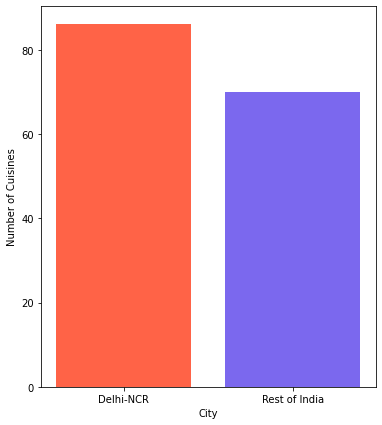

In [24]:
data=start.copy()
data = data[data['Country Code'] == 1]
data['Cuisines']=data['Cuisines'].fillna("")
l=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad', 'Delhi-NCR']
for i in data['City']:
            if (i in l):
                data['City'].replace(i,"Delhi-NCR",inplace=True)
            else:
                data['City'].replace(i,"Rest of India",inplace=True)

del_cu=[]
rest_cu=[]
for i,j in zip(data['City'],data['Cuisines']):
    if i=='Delhi-NCR':
        for z in j.split(','):
            del_cu.append(z.strip())
    elif i=='Rest of India':
        for k in j.split(','):
            rest_cu.append(k.strip())

del_cu=set(del_cu)
rest_cu=set(rest_cu)
cuisines=[len(del_cu),len(rest_cu)]
cities=['Delhi-NCR','Rest of India']
for i,j in zip(cities,cuisines):
    print(i,j)
# Bar Graph code
plt.bar(cities,cuisines,color=('tomato','mediumslateblue'))
plt.xlabel('City')
plt.ylabel('Number of Cuisines')
plt.title('')
plt.show()

# 2.1 Influence of No. of votes of a restaurant on its User Rating

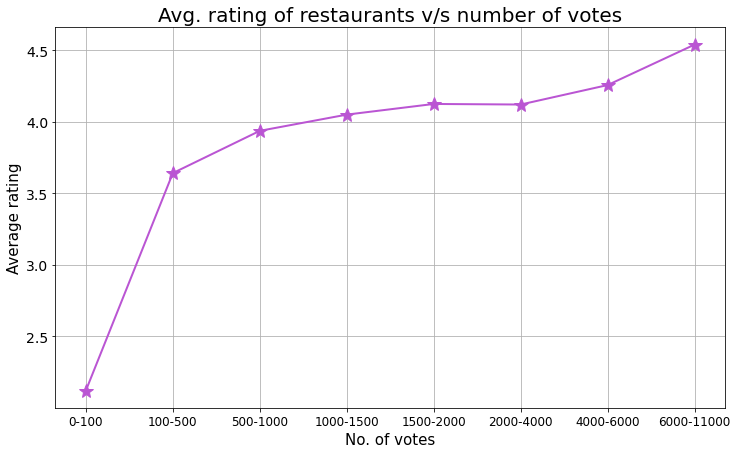

In [29]:
# No. of votes range from 0 to above 10000 and plots with equal intervals on x axis were not depicting proper  
# correlation between required quantities , so i clubbed no. of votes in unequal groups 
# (as restaurants with more no of votes are generally less and vice -versa)
# and then plotted the graph
data = start.copy()
data = data[data['Country Code'] == 1]

## each list will store ratings of restaurants having no. of votes in a specific range.
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []
l7 = []
l11 = []

## filling each list with rating depedning upon range of no. of votes of restaurant
for i,j in zip(data['Votes'] , data['Aggregate rating']):
    if i <= 100:
        l1.append(j)
    elif i>100 and i<=500:
        l2.append(j)
    elif i> 500 and i<=1000:
        l3.append(j)
    elif i>1000 and i<=1500:
        l11.append(j)
    elif i>1500 and i<=2000:
        l4.append(j)
    elif i>2000 and i<=4000:
        l5.append(j)
    elif i>4000 and i<=6000:
        l6.append(j)
    else:
        l7.append(j)

## these variables store average rating for each list 
avg1 = mean(l1)
avg2 = mean(l2)
avg3 = mean(l3)
avg11 = mean(l11)
avg4 = mean(l4)
avg5 = mean(l5)
avg6 = mean(l6)
avg7 = mean(l7)

avg = [avg1,avg2,avg3,avg11,avg4,avg5,avg6,avg7]

## Plotting the graph with grp as range of no. of votes 
plt.rcParams['figure.figsize'] = (12,7)
grp = ['0-100' ,'100-500', '500-1000' , '1000-1500' , '1500-2000' , '2000-4000' , '4000-6000' , '6000-11000']
plt.plot(grp , avg ,'-*', linewidth = 2 , markersize = 15 , color = 'mediumorchid')
plt.title('Avg. rating of restaurants v/s number of votes' , fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.grid()
plt.xlabel('No. of votes' , fontsize = 15)
plt.ylabel('Average rating' , fontsize = 15)
plt.show()

In [31]:
# to know how Aggregate rating is distributed for no. of votes >3000 as at times mean alone may not depict clear picture 
(data[data['Votes']>3000])['Aggregate rating'].describe()

count    37.000000
mean      4.256757
std       0.337096
min       3.500000
25%       4.100000
50%       4.300000
75%       4.400000
max       4.900000
Name: Aggregate rating, dtype: float64

# 2.2 Influence of No. of cuisines served by a restaurant on User Rating

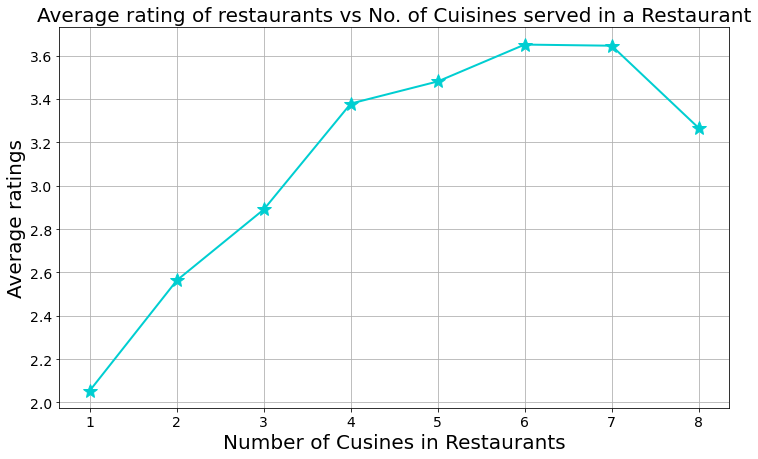

In [35]:
data = start.copy()
data = data[data['Country Code'] == 1]

## making a new column storing count of no. of cuisines served in a restaurant . 
data['no_of_cuisines'] = data.apply(lambda row : len(row.Cuisines.split(',')) , axis = 1) 

## calculating average rating depending upon no. of cuisines served 
k_v = data.groupby('no_of_cuisines')['Aggregate rating'].mean()
x = k_v.index
y = k_v.values

## plotting the line graph
plt.rcParams['figure.figsize'] = (12,7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Average rating of restaurants vs No. of Cuisines served in a Restaurant' , fontsize = 20)
plt.xlabel('Number of Cusines in Restaurants' , fontsize = 20)
plt.ylabel('Average ratings' , fontsize = 20)
plt.plot(x,y , '-*' , linewidth = 2 , markersize = 14 , color = 'darkturquoise')
plt.grid()
plt.show()

# 2.3 Influence of Average Cost for 2 of a Restaurant on user rating .

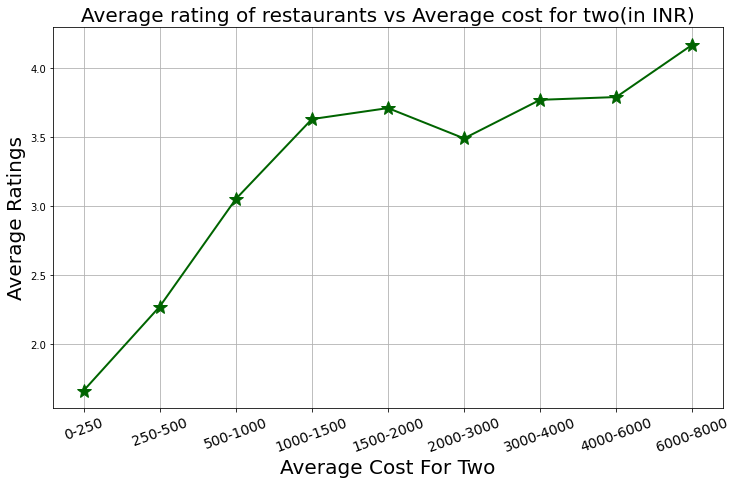

In [43]:
#2.1.3 Average Cost of Restaurant for 2 vs rating
data=start.copy()
data = data[data['Country Code'] == 1]
data['Cuisines']=data['Cuisines'].fillna("")


g1=[]
g2=[]
g3=[]
g4=[]
g5=[]
g6=[]
g7=[]
g8=[]
g9=[]
# filling each list with rating depending upon range of avg. cost for two .
for j,i in zip(data['Aggregate rating'],data['Average Cost for two']):  
    if i <= 250:
        g1.append(j)
    elif i> 250 and i<=500:
        g2.append(j)
    elif i>500 and i<=1000:
        g3.append(j)
    elif i>1000 and i<=1500:
        g4.append(j)
    elif i>1500 and i<=2000:
        g5.append(j)
    elif i>2000 and i<=3000:
        g6.append(j)
    elif i>3000 and i<=4000:
        g7.append(j)
    elif i>4000 and i<=6000:
        g8.append(j)
    else:
        g9.append(j)

avg1=round(mean(g1),2)
avg2=round(mean(g2),2)
avg3=round(mean(g3),2)
avg4=round(mean(g4),2)
avg5=round(mean(g5),2)
avg6=round(mean(g6),2)
avg7=round(mean(g7),2)
avg8=round(mean(g8),2)
avg9=round(mean(g9),2)


avgc = ['0-250','250-500','500-1000','1000-1500','1500-2000','2000-3000','3000-4000','4000-6000','6000-8000']
avg = [avg1,avg2,avg3,avg4,avg5,avg6,avg7,avg8,avg9]

## Plotting the graph with grp as range of avg cost for two 
plt.rcParams['figure.figsize'] = (12,7)
plt.plot(avgc,avg,'-*',linewidth=2, markersize=14,color='darkgreen')
plt.xticks(rotation = 20 , fontsize = 14)
plt.ylabel('Average Ratings', fontsize = 20)
plt.xlabel('Average Cost For Two', fontsize = 20)
plt.title('Average rating of restaurants vs Average cost for two(in INR)' , fontsize = 20)
plt.grid()
plt.show()

# 2.4 Influence of Restaurants serving some specific cuisines on User rating.

Top 30 Most popular cuisines in India in terms of no. of restaurants that serve them :

['North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Bakery', 'Continental', 'Italian', 'South Indian', 'Cafe', 'Desserts', 'Street Food', 'Mithai', 'Pizza', 'American', 'Ice Cream', 'Beverages', 'Thai', 'Asian', 'Biryani', 'Burger', 'Healthy Food', 'Mexican', 'European', 'Raw Meats', 'Finger Food', 'Salad', 'Mediterranean', 'Japanese', 'Seafood', 'Lebanese']

Top 30 cuisines in terms of avg. rating of restaurants that serve them :

Mediterranean 3.928089887640451
European 3.844915254237287
Asian 3.7459459459459468
Mexican 3.6472868217054266
Seafood 3.63375
Japanese 3.604938271604937
Thai 3.597549019607844
Continental 3.507330567081602
Italian 3.500000000000001
American 3.4098214285714277
Lebanese 3.3968749999999996
Burger 3.259146341463415
Cafe 3.2293929712460043
Finger Food 3.226851851851854
Salad 3.146153846153846
Healthy Food 3.032413793103449
Desserts 2.8567114093959733
Pizza 2.6878205128205117

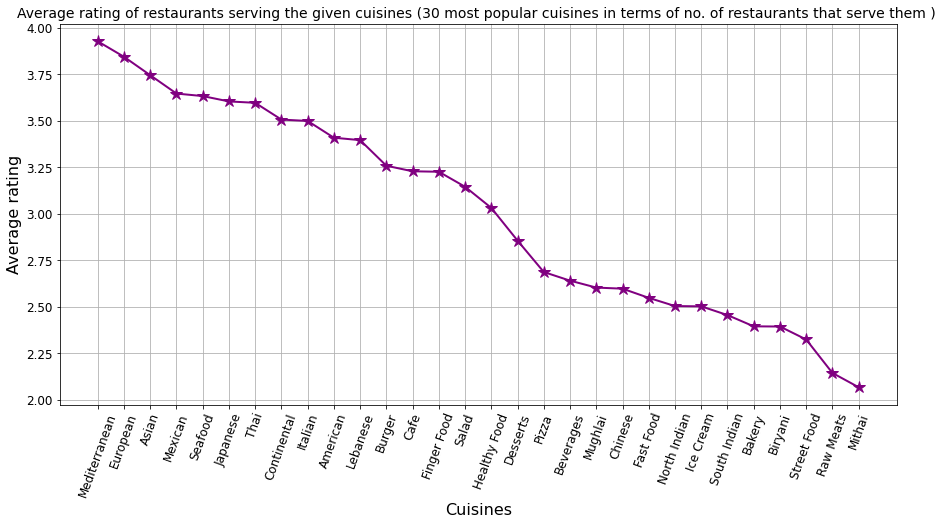

In [49]:
data = start.copy()
data = data[data['Country Code'] == 1]
# dic will have keys as Cuisine and value as no. of restaurants that serve this cuisine
dic = {}
for i,j in zip(data['Cuisines'] , data['Aggregate rating']):
    i = i.split(',')
    i = list(map(str.strip , i))
    for cui in i:
        dic[cui] = dic.get(cui,0) + 1

# sorting dic in descending order of its values
dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1] , reverse = True)}

# l will store names of top 30 most popular cuisines in terms of no. of restaurants that serve them 
l = []
c = 0
for k in dic:
    if c == 30:
        break
    #gives top 30 most popular cuisines
    l.append(k)
    c += 1

print('Top 30 Most popular cuisines in India in terms of no. of restaurants that serve them :')
print()
print(l)
print()

# find sum of ratings of restaurant serving a cuisine and no. of restaurants that serve that
# cuisine as two values and key as cuisine name and store all this in dict dic
dic = defaultdict(dict)
for i,j in zip(data['Cuisines'] , data['Aggregate rating']):
    i = i.split(',')
    i = list(map(str.strip , i))
    for cui in i:
        if cui in l:
            if cui in dic:
                dic[cui][0] = dic[cui][0] + j
                dic[cui][1] += 1
            else:
                dic[cui][0] = 0
                dic[cui][1] = 0
                
## dic2 will have key cuisine and value as average rating of all restaurants serving this cuisine 
dic2 = {}
for k in dic:
    ## to avoid divide by 0 exception
    if dic[k][1] != 0:
        ## dic[k][0] will have sum of all aggregate ratings and dic[k][1] will have total no. of ratings 
        ## so dividing both will give us required avergae rating of restaurant for the cuisine k as key
        dic2[k] = dic[k][0]/dic[k][1]

## sorting dic2 in descending order of average ratings 
dic2 = {k: v for k, v in sorted(dic2.items(), key=lambda item: item[1] , reverse = True)}

Cuisines = []
Avg_rating = []

print('Top 30 cuisines in terms of avg. rating of restaurants that serve them :')
print()
for k in dic2:
    Cuisines.append(k)
    Avg_rating.append(dic2[k])
    print(k , dic2[k])

## Plotting line chart 
plt.rcParams['figure.figsize'] = (15,7)
plt.plot(Cuisines , Avg_rating ,'-*', linewidth = 2 , markersize = 12 , color = 'purple')
plt.xticks(rotation = 70 , fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Average rating of restaurants serving the given cuisines (30 most popular cuisines in terms of no. of restaurants that serve them ) ' , fontsize = 14)
plt.grid()
plt.xlabel('Cuisines' , fontsize = 16)
plt.ylabel('Average rating' , fontsize = 16)
plt.show()

# 2.5 Weighted restaurant rating of each locality.

In [50]:
data=start.copy()
data = data[data['Country Code'] == 1]
data = data[data['Votes']!=0]
# Formula : Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes)


# creating a new column rating_locality which is product of rating and votes 
data['rating_locality']=data.apply(lambda row: row['Aggregate rating']*row['Votes'], axis=1)

# adding rating_locality values locality wise 
indee = data.groupby('Locality Verbose')['rating_locality'].sum()

# numerator of our formula of weighted restaurant rating
n=indee.values
locality=indee.index

# d is here denominator of our formula of weighted restaurant rating
d=data.groupby('Locality Verbose')['Votes'].sum().values

# weighted_rating stores weighted restaurant rating
weighted_rating = np.divide(n,d)
s = pd.Series(locality, index=weighted_rating)
s.sort_index(ascending = False, inplace = True)
w_rating=s.index.tolist()
locality=s.values.tolist()
count=10
for i,j in zip(locality, w_rating):
  if count==0:
    break
  print(i, " : ", j)
  count=count-1

Aminabad, Lucknow  :  4.9
Hotel Clarks Amer, Malviya Nagar, Jaipur  :  4.9
Friends Colony, New Delhi  :  4.886916367367881
Powai, Mumbai  :  4.841868613138686
Kirlampudi Layout, Vizag  :  4.820161290322581
Express Avenue Mall,  Royapettah, Chennai  :  4.8
Deccan Gymkhana, Pune  :  4.8
Banjara Hills, Hyderabad  :  4.7187617260787995
Sector 5, Salt Lake, Kolkata  :  4.707022552098202
Riverside Mall, Gomti Nagar, Lucknow  :  4.7


# 3.1 Top 15 restaurants have a maximum number of outlets.

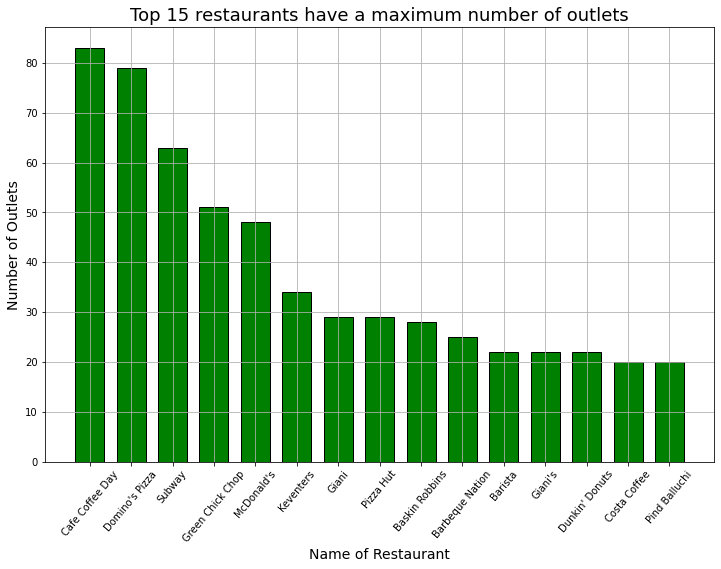

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Giani               29
Pizza Hut           29
Baskin Robbins      28
Barbeque Nation     25
Barista             22
Giani's             22
Dunkin' Donuts      22
Costa Coffee        20
Pind Balluchi       20
Name: Restaurant Name, dtype: int64


In [62]:
# 3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.

data=start.copy()
data = data[data['Country Code'] == 1]

#restaurant Name wise top 15 restaurants having maximum no. of outlets 
d = data['Restaurant Name'].value_counts()[:15]

#x stores restaurant name
x = d.index

#y stores no. of outlets
y = d.values

# Bar Graph code

plt.rcParams['figure.figsize'] = (12,8)
plt.bar(x,y,color=('g'),edgecolor='black',width = 0.7)
plt.title('Top 15 restaurants have a maximum number of outlets' , fontsize = 18)
plt.xlabel('Name of Restaurant' , fontsize = 14)
plt.ylabel('Number of Outlets' , fontsize = 14)
plt.xticks(label=x,rotation=50)
plt.grid()
plt.show()

print(d)

# 3.2 Histogram of aggregate rating of restaurants .

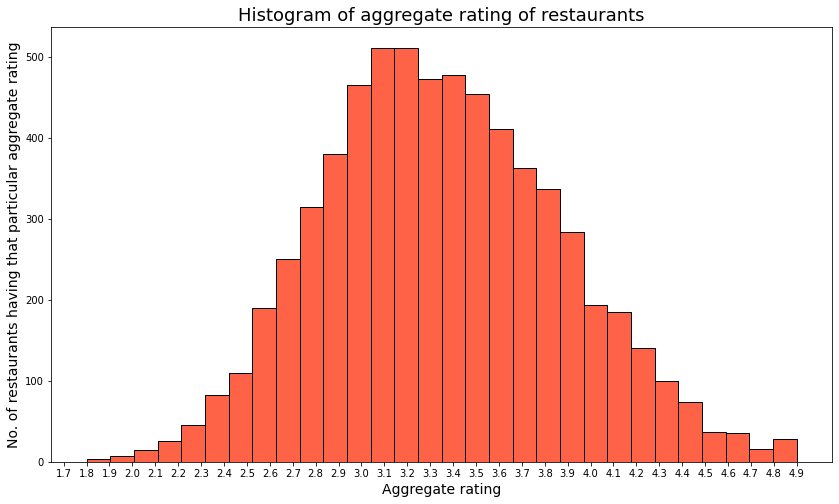

In [56]:
# 3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant)
data=start.copy()
data = data[data['Country Code'] == 1]

#ignoring the unrated restaurants
data = data[data['Aggregate rating']!=0]

#plotting the histogram taking 30 bins
plt.rcParams['figure.figsize'] = (14,8)

#setting xticks from 0-5 with 0.1 step size as it denoted rating
plt.xticks(np.arange(0,5,0.1))
plt.title('Histogram of aggregate rating of restaurants' , fontsize = 18)
plt.xlabel('Aggregate rating' , fontsize = 14)
plt.ylabel('No. of restaurants having that particular aggregate rating' , fontsize = 14)
plt.hist(data['Aggregate rating'] , edgecolor = 'black' , bins = 30,color = "tomato")
plt.show()

# 3.3 Top 10 restaurants in the data with the highest number of votes .

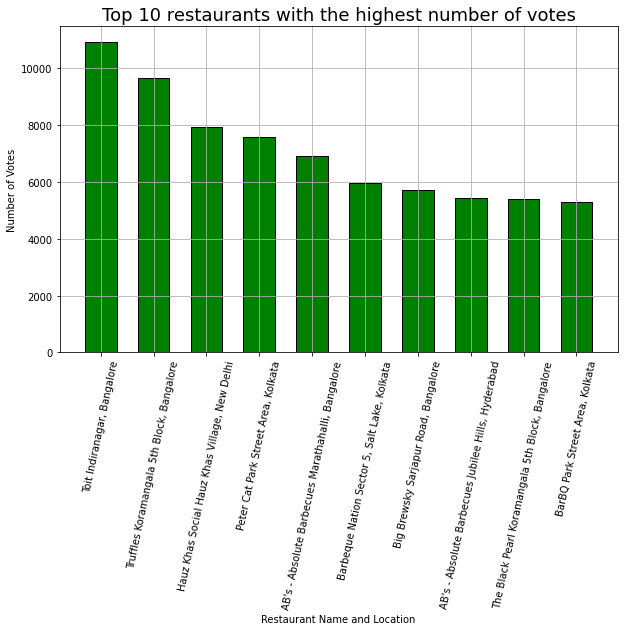

Toit Indiranagar, Bangalore : 10934 votes
Truffles Koramangala 5th Block, Bangalore : 9667 votes
Hauz Khas Social Hauz Khas Village, New Delhi : 7931 votes
Peter Cat Park Street Area, Kolkata : 7574 votes
AB's - Absolute Barbecues Marathahalli, Bangalore : 6907 votes
Barbeque Nation Sector 5, Salt Lake, Kolkata : 5966 votes
Big Brewsky Sarjapur Road, Bangalore : 5705 votes
AB's - Absolute Barbecues Jubilee Hills, Hyderabad : 5434 votes
The Black Pearl Koramangala 5th Block, Bangalore : 5385 votes
BarBQ Park Street Area, Kolkata : 5288 votes


In [64]:
data = start.copy()
data = data[data['Country Code'] == 1]

#restaurant Id wise calculating no. of votes. 
iv = data.groupby(['Restaurant ID' , 'Restaurant Name' , 'Locality Verbose'])['Votes'].sum().sort_values(ascending = False)[0:10]

#listt stores Restaurant ID , 'Restaurant Name' , 'Locality Verbose' , separating res id and clubbing other two as one 
#name in other list x 
listt = iv.index.tolist()
xaxi = []

for name in listt:
    e = str(name[1]) + ' ' + str(name[2])
    xaxi.append(e)

# code for bar graph
plt.rcParams['figure.figsize'] = (10,6)
plt.bar(xaxi , iv.values ,color=('g'),edgecolor='black', width = 0.6)
plt.title('Top 10 restaurants with the highest number of votes' , fontsize = 18)
plt.ylabel('Number of Votes')
plt.xlabel('Restaurant Name and Location')
plt.xticks(rotation = 78)
plt.grid()
plt.show()

for ele ,v in zip(xaxi , iv.values):
    print(ele ,':',v , 'votes')

# 3.4 Top 10 cuisines present in restaurants in the USA .

American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


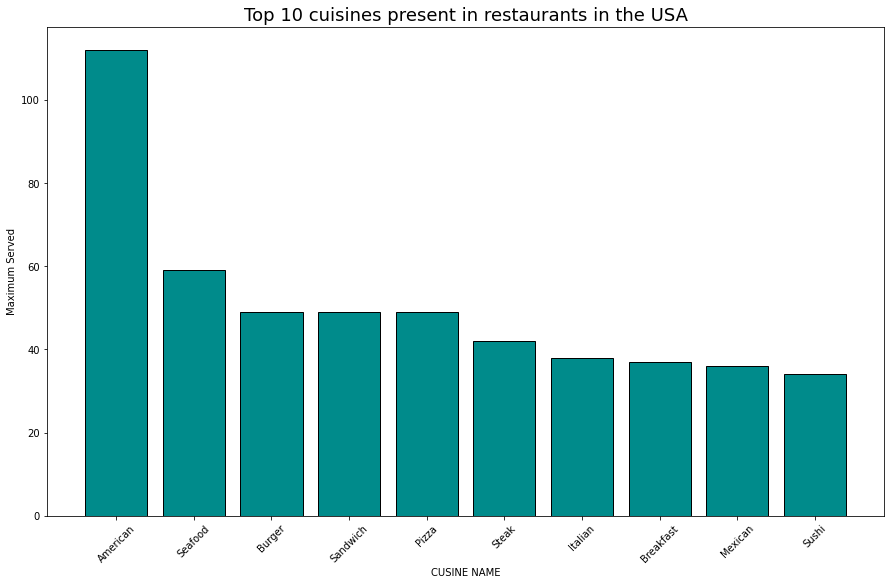

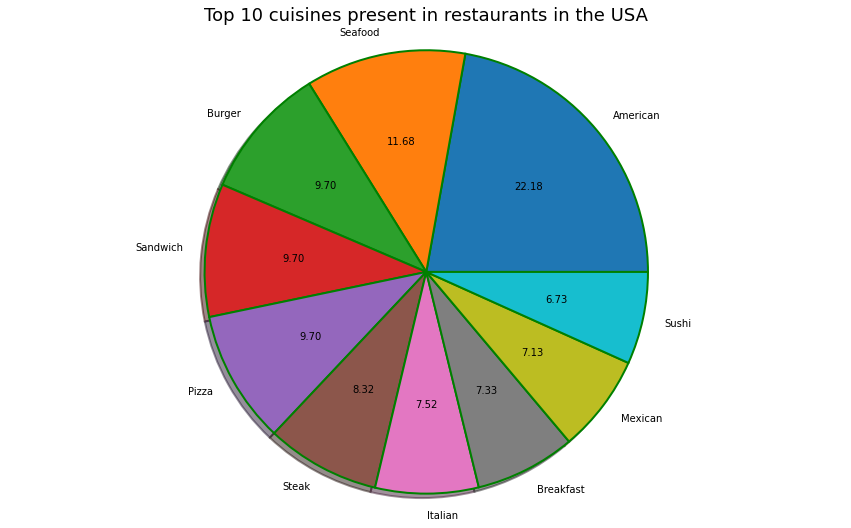

In [67]:
data=start.copy()
data['Cuisines']=data['Cuisines'].fillna("")

cusines=[]
cusines
for i,j in zip(data['Country Code'],data['Cuisines']):
    #216 is country code of usa
    if (i==216):    
        for z in j.split(','):
            cusines.append(z.strip())
            
cusines_max={}

for i in cusines:
    if i in cusines_max:
        cusines_max[i]+=1
    else:
        cusines_max[i]=1

d=Counter(cusines_max).most_common(10)# sorting occurs by most common
cus_name=[]
cus_no=[]
for i in d:
    cus_name.append(i[0])
    cus_no.append(i[1])
    print(i[0],i[1])


# Bar Graph code
plt.rcParams['figure.figsize'] = (15,9)
plt.bar(cus_name, cus_no,color='darkcyan',edgecolor='black')
plt.xlabel('CUSINE NAME')
plt.ylabel('Maximum Served')
plt.xticks(label=cus_name, rotation=45) 
plt.title('Top 10 cuisines present in restaurants in the USA' , fontsize = 18)
plt.show()

# Pie chart code
plt.rcParams['figure.figsize'] = (15,9)
plt.pie(cus_no,labels=cus_name,autopct='%.2f',shadow=True,wedgeprops={'linewidth':2,'edgecolor':"green"})
plt.title('Top 10 cuisines present in restaurants in the USA' , fontsize = 18)
plt.axis('equal')   
plt.show()

# 3.5 Bubble graph of a number of Restaurants present in each city of India and keeping the weighted restaurant rating of the city in a bubble .

City             Weighted restaurant Rating of each city

Secunderabad : 4.548054679284963
Bangalore : 4.497423148890671
Hyderabad : 4.487772943857468
Lucknow : 4.3235268346111715
Chennai : 4.319682253114281
Mohali : 4.3
Kolkata : 4.295151705424619
Pune : 4.2839957553540415
Jaipur : 4.281507965242579
Guwahati : 4.265733279613215


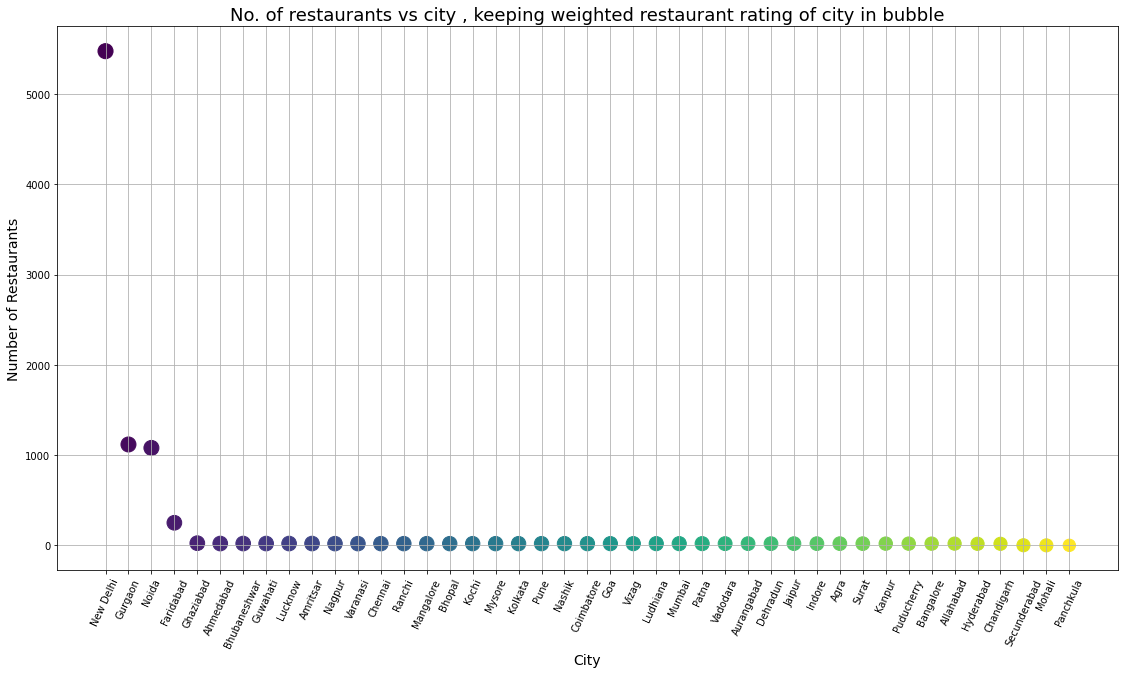

In [71]:
data = start.copy()
data = data[data['Country Code'] == 1]
data = data[data['Votes']!=0]

#creating a new column rating_locality which is product of rating and votes
data['rating_locality'] = data.apply(lambda row : row['Aggregate rating']*row['Votes'] , axis = 1)

#citywise calculating sum of rating_locality values
indee = data.groupby('City')['rating_locality'].sum()

#n is numerator of our formula of weighted restaurant rating
n = indee.values
locality = indee.index

# d is here denominator of our formula of weighted restaurant rating
d = data.groupby('City')['Votes'].sum().values

#stores weighted_res. rating citywise
weighted_rating = np.divide(n,d)

#mapping a city to its weighted rest. rating
s = pd.Series(locality , index = weighted_rating)

#sorting in descending order
s.sort_index(ascending = False , inplace = True)

#obtaining city names and respective ratings
w_rating = s.index.tolist()
locality = s.values.tolist()

print('City            ', 'Weighted restaurant Rating of each city')
print()
count=10
for i , j in zip(locality , w_rating):
  if(count==0):
      break
  print(i ,':', j)
  count=count-1

#plotting the required bubble chart 
city_res = df.City.value_counts()
city = city_res.index
nor = city_res.values
plt.rcParams['figure.figsize'] = (19,10)
c = np.arange(len(city))
w_rating_numpy = np.array(w_rating)
plt.scatter(city , nor , s = (w_rating_numpy)*50 , c = c)
plt.xticks(rotation = 65)
plt.title('No. of restaurants vs city , keeping weighted restaurant rating of city in bubble' , fontsize = 18)
plt.ylabel('Number of Restaurants' , fontsize = 14)
plt.xlabel('City' , fontsize = 14)
plt.grid()
plt.show()